<a href="https://www.kaggle.com/code/aakanksha0806/word-frequency-in-classic-novels?scriptVersionId=161022335" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The aim of this project is to explore and analyze the word frequency in a classic novel. To achieve this, we employed several Python libraries to facilitate web scraping, text processing, and frequency analysis. The primary libraries utilized in this project include ***requests*** for making HTTP requests, ***BeautifulSoup*** for web scraping, ***nltk*** for natural language processing, and ***Counter*** for counting word occurrences.

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter

# 1. Web Content Retrieval

***requests*** library is used to fetch the content of a webpage from *Project Gutenberg* which provides access to free literature. HTTP request is made to the URL of Jane Austen's classic novel, *'Pride and Prejudice'*.

The encoding attribute is set to 'utf-8' to correctly handle the character encoding of the HTML content. To explore the structure of the scraped content, a short snippet of the text can be printed.

In [2]:
r = requests.get('https://www.gutenberg.org/cache/epub/1342/pg1342-images.html')
r.encoding = 'utf-8'

html = r.text
print(html[2000:3000])

lue;
    text-decoration: none
    }
a:visited {
    background-color: #fff;
    color: purple;
    text-decoration: none
    }
a:hover {
    background-color: #fff;
    color: #F00;
    text-decoration: underline
    }
.blk {
    page-break-before: always;
    page-break-after: always;
    margin: 2em auto
    }
.cbig250 {
    text-align: center;
    text-indent: 0%;
    font-weight: normal;
    font-size: 200%
    }
body {
    margin-left: 4%;
    margin-right: 6%;
    background: #fff;
    color: black;
    font-family: "Times New Roman", serif;
    font-size: medium
    }
.blockquot {
    margin-top: 2%;
    margin-bottom: 2%
    }
.c {
    text-align: center;
    text-indent: 0%
    }
.caption {
    font-weight: normal
    }
.caption p {
    font-size: 75%;
    text-align: center;
    text-indent: 0%
    }
.fint {
    text-align: center;
    text-indent: 0%;
    margin-top: 2em;
    font-size: 65%
    }
.figcenter {
    margin


# 2. Cleaning Text

From the previous step, we get the HTML content of the webpage. But this is not quite what we want. So, we use ***BeautifulSoup*** library to parse the HTML content and extract the text. BeautifulSoup is a powerful library for navigating and searching HTML content, making it essential for extracting specific elements, such as the text of a classic novel, from the webpage's HTML structure.



In [3]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()

Unwanted sections at the start and end of the extracted text are identified and removed using Python slicing. This step is crucial to ensure that only the relevant content, in this case, the text of "Pride and Prejudice," is retained for subsequent analysis. Unwanted sections, such as publication information, are discarded.

In [4]:
print(text.index('CHISWICK PRESS:—CHARLES WHITTINGHAM AND CO.', 700000))
print(text.index('Chapter I.', 30000))
# print("*********************************************************************************")
# print(text[28000:30206])
# print("*********************************************************************************")
# print(text[726719:])

726719
30206


In [5]:
text = text[30206 : 726719]
# print(text)

# 3. Extract the Words

The extracted text is tokenized (break down into individual units) into words. It is a fundamental step in text analysis. The **nltk.tokenize.word_tokenize** method is employed to tokenize the text into individual words. 

In [6]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:10]

['Chapter',
 'I',
 'IT',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 'that',
 'a']

Then list comprehension is used to convert all words to lowercase. This is crucial for ensuring that words with different cases (e.g., 'And' and 'and') are treated as the same word in subsequent text analysis tasks, preventing the duplication of word counts.


In [7]:
words = [token.lower() for token in tokens]
print(words[:5])

['chapter', 'i', 'it', 'is', 'a']


# 4. Remove stop words

It is a common practice to exclude frequently occurring and less informative words, such as 'the', 'of', and 'a'. These words, known as **stop words**, do not contribute significantly to the analysis and are often removed to focus on more meaningful content. To streamline this process, the **nltk** library provides a comprehensive list of stop words in English.

In [8]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

final_words = [word for word in words if word not in sw]
final_words[:10]

['chapter',
 'truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possession',
 'good',
 'fortune',
 'must']

The final_words list, obtained after the removal of stop words, now contains a refined set of words that can be used for further analyses. This step contributes to the precision and interpretability of the results.

# 5. Word Frequency Analysis

The Counter class is utilized to count the occurrences of each word in the refined set of words (final_words) and then identify the top ten most frequently occurring words

In [9]:
count = Counter(final_words)
top_ten = count.most_common(10)
top_ten

[('mr', 777),
 ('elizabeth', 621),
 ('could', 524),
 ('would', 470),
 ('darcy', 418),
 ('said', 403),
 ('mrs', 345),
 ('much', 329),
 ('bennet', 327),
 ('must', 309)]

# 6. Displaying the Result

Word clouds offer an effective visual representation of word frequency, highlighting key terms based on their occurrence. So we can visually represent the top 30 most frequently occurring words in the classic novel "Pride and Prejudice" using a word cloud. 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
    
top_30 = count.most_common(30)
top_words = []

i=0
while(i < len(top_30)):
    top_words.append(top_30[i][0])
    i+=1

top_words


['mr',
 'elizabeth',
 'could',
 'would',
 'darcy',
 'said',
 'mrs',
 'much',
 'bennet',
 'must',
 'bingley',
 'jane',
 'miss',
 'one',
 'know',
 'well',
 'though',
 'never',
 'soon',
 'sister',
 'think',
 'good',
 'might',
 'time',
 'may',
 'wickham',
 'lady',
 'little',
 'every',
 'collins']

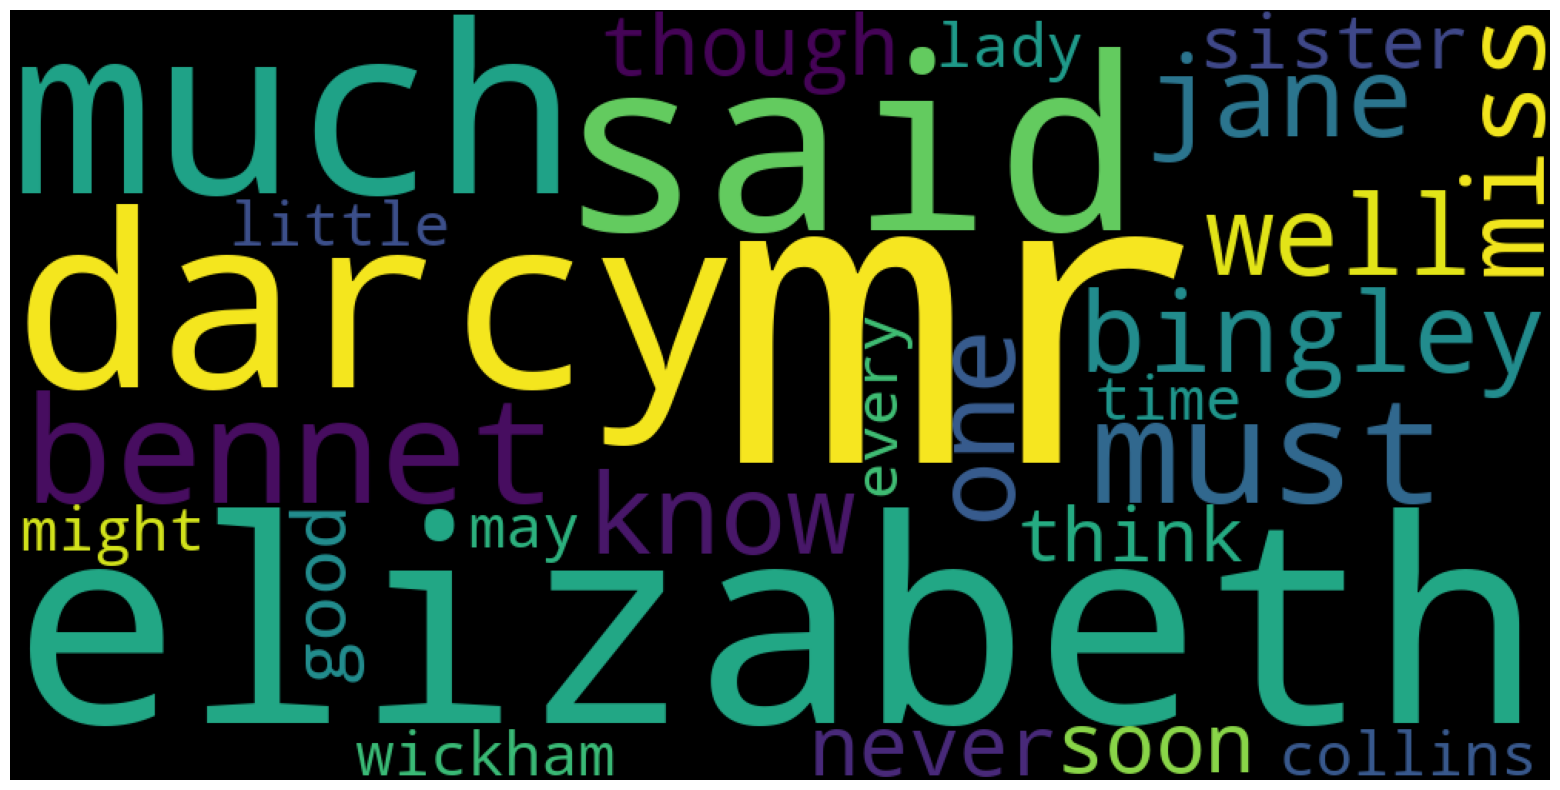

In [11]:
unique_string = (" ").join(top_words)
wordcloud = WordCloud(width=1000, height=500).generate(unique_string)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The resulting word cloud visually communicates the most prominent words in "Pride and Prejudice," with larger and bolder words indicating higher frequency. This graphical representation serves as an accessible summary, aiding in the interpretation and communication of key terms within the classic novel.